 <font size="6">Генеративные модели</font>

# "Классические" генеративные алгоритмы

## Задача генерации

В этой лекции мы разберемся, как научить нейросеть создавать что-то новое.

**Постановка задачи генерации**

**Дано**: неразмеченные данные

**Выход**: новые данные, которые будут удовлетворять следующим условиям:
* Новые данные должны быть **похожи** на исходные.
* Но **не повторять** их в точности (или повторять, при случайном стечении обстоятельств).
* Чтобы результат генерации был различным при разных запусках, нам нужен **элемент случайности**.

## Простейший пример: генерация объектов из нормального распределения

Предположим, у нас под рукой есть генератор случайных чисел, который позволяет нам легко получить случайные числа в диапазоне $[0,1]$:

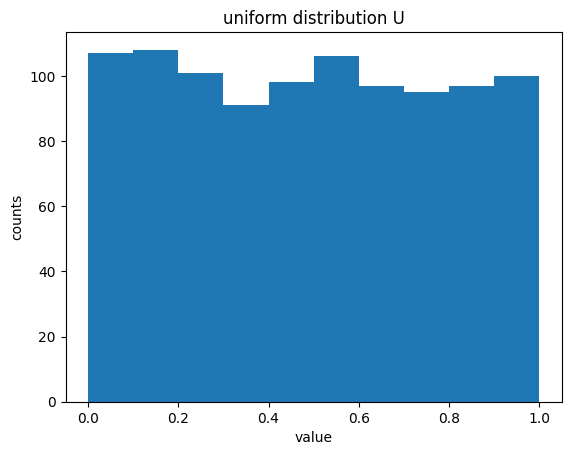

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


uniform_noise = np.random.uniform(size=1000)
plt.hist(uniform_noise)
plt.title("uniform distribution U")
plt.ylabel("counts")
plt.xlabel("value")
plt.show()

Пусть $U_i$ — точка, которую даёт нам генератор равномерно распределенных случайных чисел. Если мы возьмём пару таких таких точек $U_1$, $U_2$ и произведём с ними так называемое [преобразование Бокса-Мюллера](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform), то получим пару новых точек $X$ и $Y$ на вещественной прямой:

$$
\begin{array}{l}
X=\sqrt{-2 \log U_{1}} \cos \left(2 \pi U_{2}\right) \\
Y=\sqrt{-2 \log U_{1}} \sin \left(2 \pi U_{2}\right)
\end{array}
$$

Повторив такую процедуру для большого числа точек $U_i$, можно заметить, что распределение для объектов $X$ и $Y$ становится похожим на стандартное нормальное:

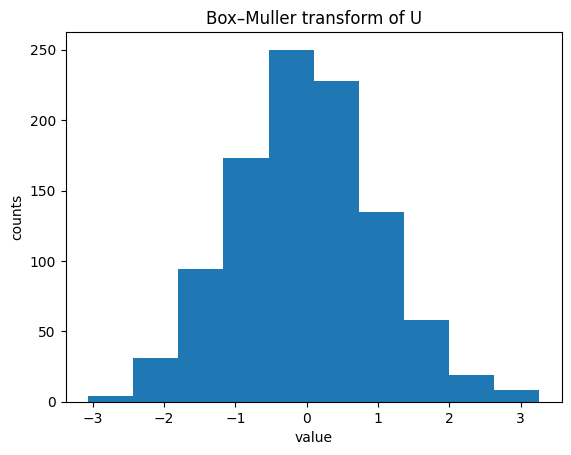

In [ ]:
U1 = np.random.uniform(size=1000)
U2 = np.random.uniform(size=1000)
R = np.sqrt(-2 * np.log(U1))
Theta = 2 * np.pi * U2
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

plt.hist(X)
plt.title("Box–Muller transform of U")
plt.ylabel("counts")
plt.xlabel("value")
plt.show()

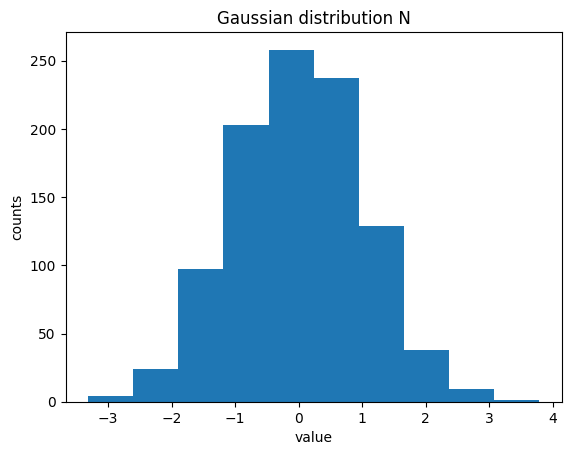

In [ ]:
gaussian_noise = np.random.normal(size=1000)
plt.hist(gaussian_noise)
plt.title("Gaussian distribution N")
plt.ylabel("counts")
plt.xlabel("value")
plt.show()

На самом деле мы можем в точности доказать, что преобразование Бокса-Мюллера преобразовало исходное равномерное распределение в стандартное нормальное:

$$
\begin{array}{l}
X=\sqrt{-2 \log U_{1}} \cos \left(2 \pi U_{2}\right) \\
Y=\sqrt{-2 \log U_{1}} \sin \left(2 \pi U_{2}\right)
\end{array}
$$

Решим уравнение относительно переменных $U_i$:
$$ \large
\begin{array}{l}
U_{1}=e^{-\left(X^{2}+Y^{2}\right) / 2} \\
U_{2}=\frac{1}{2 \pi} \arctan \left(\frac{X}{Y}\right)
\end{array}
$$

Матрица Якоби для такого преобразования:

$$ \large
J(X,Y) = \begin{bmatrix}
\frac{\partial U_1}{\partial X} & \frac{\partial U_1}{\partial Y}\\
\frac{\partial U_2}{\partial X} & \frac{\partial U_2}{\partial Y}
\end{bmatrix} =
\begin{bmatrix}
-X e^{\frac{-(X^2+Y^2)}{2}}  & -Y e^{\frac{-(X^2+Y^2)}{2}}\\
\frac{1}{2\pi} \frac{Y}{X^2 + Y^2} & \frac{1}{2\pi} \frac{-X}{X^2 + Y^2}
\end{bmatrix}
$$

Отсюда имеем:

$$ \large
\begin{aligned}
f_{X,Y}(x,y)&=f_{U_1,U_2}(e^{-\left(X^{2}+Y^{2}\right) / 2}, \frac{1}{2 \pi} \arctan \left(\frac{X}{Y}\right)) |\det(J)|\\
&= |\det(J)|\\
&= \frac{1}{\sqrt{2\pi}}e^{-\frac{X^2}{2}} \frac{1}{\sqrt{2\pi}}e^{-\frac{Y^2}{2}}
\end{aligned}
$$

То есть мы получили пару независимых случайных чисел $X$ и $Y$, каждое из которых лежит в нормальном распределении:
$$
X\perp Y, \quad X \sim \mathcal{N}(0,1),\quad Y\sim \mathcal{N}(0,1)
$$

Что делать, если нам хочется сгенерировать объекты не в стандартном нормальном распределении, а в каком-то более сложном? В общем случае нам необходимо подобрать некоторую функцию, которая будет отображать объекты из известного "простого" распределения в "целевое". Осуществляющие такое преобразование функции будем называть **генеративными моделями**.

Если целевое распределение $\mathcal{F}[\vec {x}]$ известно аналитически, то для подбора такой функции можно воспользоваться различными модификациями алгоритма [Markov Chain Monte Carlo](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo).

<img src ="https://lh3.google.com/u/0/d/1NJR3-OrRA1sOekpPezXi7uA5rh5e9UTZ=w1920-h993-iv1" width="700">

# Генеративные алгоритмы, основанные на глубоком обучении

<img src ="https://lh3.google.com/u/0/d/1WHNvvIQ90tR4vZs_gAAGbgCmsVslRFF7=w1365-h993-iv1" width="700">

# Введение  в генеративно-состязательные нейронные сети

**Эволюция в генерации изображений лиц:**

[Множество примеров различных генераторов](https://thisxdoesnotexist.com)


<img src ="https://lh3.google.com/u/0/d/1UVn1J6iWYaYPvepaEErrTkFtAF9an-XM=w1365-h993-iv1" width="700">

## Latent space

Разберемся с **элементом случайности**. В нейронных сетях мы привыкли к **воспроизводимости** результата: в режиме валидации мы можем несколько раз подать на вход один и тот же объект и получить один и тот результат.  Возникает два вопроса:
- что подавать на **вход** сети для генерации?
- как реализовать **случайность**?

Ответ на оба вопроса: подавать в качестве **входа** вектор **случайного шума**.

<img src ="https://lh3.google.com/u/0/d/1qS9kSWS_llqDFA8SVrA1WlZdvDxTiDZs=w1365-h993-iv1" width="700">

Почему именно **вектор**? Почему не одно **случайное число**?

**Ответ**: входной вектор можно рассматривать как **признаки** генерируемого объекта. Каждый такой признак — **независимая случайная величина**. Если мы будем передавать только одно случайное число, то генерация будет однообразной. Чем больше признаков (степеней свободы) у входного вектора, тем разнообразнее будет результат генерации.

То есть случайный шум **большей размерности** даёт нам **больше вариабельности**  для генерации. Это называется **input latent space** — входное латентное пространство.

**Note:** *из-за неустоявшейся терминологии случайное распределение на входе генератора называется латентным пространством так же, как и скрытое пространство в автоэнкодерах. Поэтому в этой лекции будем называть его **входным** латентным пространством. Также в статьях встречается вариант: predefined latent space.*

Каждую компоненту латентного пространства можно рассматривать как отдельную шкалу, вдоль которой изменяются определенные свойства генерируемых объектов. Например, можно выбрать четыре латентных вектора и посмотреть, как генерируемые объекты плавно изменяются при переходе от одного вектора к другому.

<center><img src ="https://lh3.google.com/u/0/d/1B7dSx1xr4qWmNDenpJbIU1i97iJMbEo7=w1365-h993-iv1" width="600">

<center><em>Линейные интерполяции между четырьмя изображениями в латентном пространстве</em></center>


### Размерность входного латентного пространства

В выборе размерности входного латентного пространства важно соблюсти  баланс.
- при **низкой размерности** возникнет проблема **низкой вариабельности**.

Пример: генератор лиц с входным вектором длины 1. Результатом работы генератора будет всего одна шкала, вдоль которой будут расположены генерируемые изображения. Скорее всего, генератор выучит наиболее простую и "очевидную" шкалу: от молодой женщины блондинки к пожилому мужчине брюнету. У такой сети будет низкая вариабельность — она не сможет сгенерировать, например, рыжего ребенка в очках.

- при **большой размерности** латентное пространство может быть слишком **разреженным**.

При обучении модели количество точек в этом латентном пространстве будет настолько мало, что в основном пространство будет состоять из пустот. Тогда модель будет крайне некачественно генерировать объекты в точках латентного пространства, далеких от точек обучающей выборки.

Лучший способ выбрать длину вектора — это найти публикацию с похожей задачей и взять значение из нее.

Если такой информации нет, то придется экспериментировать. Лучше начинать с низкой размерности латентного пространства, чтобы наладить работу всей сети, пусть и с низким разнообразием, а затем проводить эксперименты по поиску оптимальной размерности.

Можно использовать собственные знания в предметной области: спросите себя, сколькими вещественными числами можно описать важную информацию об объекте.

### Распределение входных латентных векторов

Как мы знаем инициализация весов и нормализация входных данных вносят существенный вклад в работу модели. Поэтому принято использовать **многомерное нормальное распределение** для input latent space. Оно лучше взаимодействует с весами модели и улучшает сходимость.

<center><img src ="https://lh3.google.com/u/0/d/1t_SJe2qlzeFwhp4I7A83Epr_WgbQUSrc=w1365-h993-iv1" width="600"></center>

<center><em>Двумерное нормальное распределение</em></center>

##  Generative adversarial network (GAN)

[2014 Generative Adversarial Networks (Goodfellow et al., 2014)](https://arxiv.org/abs/1406.2661)


**Генеративно-состязательную** сеть описал Иан Гудфеллоу из компании Google (на тот момент) в 2014 году. Сейчас он возглавляет подразделение машинного обучения в Apple. Принцип состязательности в сети **GAN** нередко описывается через метафоры.

<center><img src ="https://lh3.google.com/u/0/d/1GuxSPLvMYIdQfUGN4USJCFTVhWnGdl_R=w1365-h993-iv1" width="700"></center>

<center><em>Схематичное представление архитектуры GAN </em></center>




### Генератор — фальшивомонетчик!

Еще со времен **AlexNet** мы знаем, что если мы что-то и умеем делать с нейросетями, то это **классификаторы**. В классическом GAN **дискриминатор** выполняет простейшую из задач классификации — **бинарную классификацию** (либо *real*, либо *fake*). А вот задача **генерации** каким-то прямым образом на тот момент решена не была.

Как использовать всю мощь классификатора для создания генератора?

Представим, что есть фальшивомонетчик $G$ (generator) и банкир с прибором для проверки подлинности купюр $D$ (discriminator).

Фальшивомонетчик черпает вдохновение из генератора случайных чисел в виде случайного шума $z$ и создает подделки $G(z)$.

Банкир $D$ получает на вход пачку купюр $x$, проверяет их подлинность и сообщает вектор $D(x)$, состоящий из чисел от нуля до единицы — свою уверенность (вероятность) по каждой купюре в том, что она настоящая. Его цель — выдавать нули для подделок $D(G(z))$ и единицы для настоящих денег $D(x)$. Задачу можно записать как максимизацию произведения $D(x)(1-D(G(z)))$, а произведение, в свою очередь, можно представить как сумму через логарифм.

Таким образом, задача банкира — максимизировать $log(D(x))+log(1-D(G(z)))$.

Цель фальшивомонетчика прямо противоположна — максимизировать $D(G(z))$, то есть убедить банкира в том, что подделки настоящие.

Продолжая аналогию, обучение генератора можно представить так: фальшивомонетчик не просто генерирует подделки наудачу. Он добывает прибор для распознавания подделок, разбирает его, смотрит, как тот работает, и затем создает подделки, которые смогут обмануть этот прибор.

Математически это **[игра](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%B8%D0%B3%D1%80) двух игроков**:

$$\large \min\limits_{\theta_g}  \max\limits_{\theta_d} [\mathbb{E}_{x _\sim p(data)} log(D_{\theta_d}(x)]+\mathbb{E}_{z _\sim p(z)}
[log(1-D_{\theta_d}(G_{\theta_g}(z))]$$



**Дискриминатор**
- обучается при **фиксированном генераторе** ${G}_{\theta_{g}}$,
- **максимизирует** функцию выше относительно $\theta_d$ (**градиентный подъем**),
- решает задачу **бинарной классификации**: старается присвоить $1$ точкам данных из обучающего набора $E_{x∼p_{data}}$ и 0 сгенерированным выборкам $E_{z∼p(z)}$.


**Генератор**
- обучается при **фиксированном дискриминаторе** $D_{θ_d}$,
- получает градиенты весов за счет backpropagation через дискриминатор,
- **минимизирует** функцию выше относительно $\theta_d$ (**градиентный спуск**).

Посредством **чередования** градиентного **подъема** и **спуска** сеть можно обучить.

Градиентный **подъем** на **дискриминаторе**:


$$\large \max\limits_{\theta_d} [\mathbb{E}_{x _\tilde{}p(data)} log(D_{\theta_d}(x)+\mathbb{E}_{z _\tilde{}p(z)} log(1-D_{\theta_d}(G_{\theta_g}(z)))]$$

Градиентный **спуск** на **генераторе**:


$$\large \min\limits_{\theta_g} \mathbb{E}_{z _\tilde{}p(z)} log(1-D_{\theta_d}(G_{\theta_d}(z)))$$

Градиентный **спуск** на **генераторе** эквивалентен градиентному **подъему**

$$\large \max\limits_{\theta_g} \mathbb{E}_{z _\tilde{}p(z)} log(D_{\theta_d}(G_{\theta_d}(z)))$$

В процессе совместного конкурентного обучения, если система достаточно сбалансирована, достигается **минимаксное состояние равновесия**, в котором обе сети эффективно учатся.

Сгенерированные удачно обученной нейросетью изображения практически неотличимы от настоящих.

Если хорошенько подумать, то можно прийти к выводу, что **loss function** в **GAN** — это не какая-то функция, заданная людьми, а еще одна **нейросеть**.

**Преимущества GAN**
* Теоретические **гарантии сходимости**
* Можно обучать обычным **SGD/Adam**
* Решает в явном виде задачу **generative modeling**, но неявным образом (**нейросети**)

**Недостатки GAN**
* **Нестабильное обучение**
* Очень **долгая сходимость**
* **Mode-collapsing** (модель выдает одно и то же изображение или один и тот же класс и т.д., независимо от того, какие входные данные ей подаются)
* **Исчезновение градиента**: дискриминатор настолько хорошо научился отличать сгенерированные образцы от реальных, что градиент весов генератора становится равным 0: в какую сторону бы генератор не изменил свои веса, дискриминатор все равно идеально распознает фальшивки
* Поиск оптимальных параметров — **pure luck**

## DCGAN — Генерация изображений

С помощью **GAN** можно, разумеется, генерировать не только точки на параболе. Можно генерировать, например, изображения. Но появляются закономерные вопросы.

### Как из шума на входе сети получить изображение?

Самым простым ответом будет: взять шум, пропустить его через **полносвязные слои** и сделать **reshape** до нужного разрешения. В целом, это будет работать.


Однако **DCGAN (Deep Convolutional GAN)** использует **сверточные** и **сверточно-транспонированные** (*convolutional* и *convolutional-transpose*) слои в дискриминаторе и генераторе соответственно. Впервые метод **DCGAN** был описан в статье [Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks (Radford et al., 2015)](https://arxiv.org/abs/1511.06434).

<center><img src ="https://lh3.google.com/u/0/d/1VgmpsAWeLpFGFrGWxJJZYXdhrmJ5go5n=w1365-h993-iv1" width="700"></center>
<center><em>Схема работы DCGAN (Radford et al., 2015).</em></center>

Ниже видна разница в генерации при помощи исключительно **полносвязных слоёв** и при помощи **обратных свёрток**. Очевидно, результат **DCGAN** лучше, чем **GAN**.

<center><img src ="https://lh3.google.com/u/0/d/1VW-n3H1HZtnaB_az_LMXNYxTWQwmQQ2m=w1365-h993-iv1" width="600"></center>
<center><em>Сравнение результатов на MNIST (Radford et al., 2015)</em></center>


### Архитектура DCGAN

На вход генератора подают шум для создания разнообразных объектов. Этот шум представляет собой вектор в многомерном пространстве. Один вектор — один сгенерированный объект. Задача дискриминатора — преобразовать вектор в изображение.

Такое преобразование возможно при помощи транспонированных сверточных (convolution-transpose, иногда называют fractionally strided convolution) слоев. Как и обычные сверточные слои, эти слои используют сверточные ядра, но перед вычислением сверток они увеличивают размер исходного изображения, "раздвигая" пиксели и заполняя образующиеся промежутки между пикселями нулями.

<center><img src ="https://lh3.google.com/u/0/d/1OF7pI6rlSbSLxe1KWpR4YxfttAThQtdM=w1365-h993-iv1" width="700"></center>
<center><em>Зеркальная архитектура DCGAN </em></center>

### Transposed Convolution Layer


Transposed convolution проходит по всем пикселям входа и умножает их на обучаемое ядро свертки. При этом каждый одиночный пиксель превращается в фрагмент. Там, где фрагменты накладываются друг на друга, значения попиксельно суммируются.

Используя Transposed convolution с параметром `stride = 2`, можно повышать размер карты признаков приблизительно в два раза, добавляя на нее мелкие детали.

<center><img src ="https://lh3.google.com/u/0/d/1tzctfR2cIABWn2bCsQaPdkQMUBq5iIww=w1365-h993-iv1" width="1024"></center>

<center><em>Transposed convolution</em></center>

In [ ]:
x = torch.rand((1, 3, 10, 10)) * 255  # one 3-channel image with 10x10 size
print(x.shape)

torch.Size([1, 3, 10, 10])


In [ ]:
convT = nn.ConvTranspose2d(in_channels=3, out_channels=3, kernel_size=3)
y = convT(x)
print(y.shape)  # One 3-chanells image with 12x12 size

torch.Size([1, 3, 12, 12])


Полученное изображение не похоже на входное, потому что были применены свёрточные ядра со случайными коэффициентами.

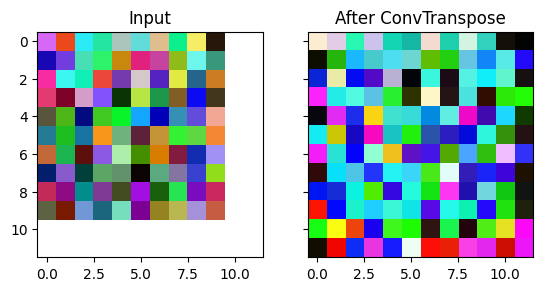

In [ ]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].imshow(x[0].permute(1, 2, 0).detach().numpy().astype(np.uint8))
ax[1].imshow(y[0].permute(1, 2, 0).detach().numpy().astype(np.uint8))
ax[0].set_title("Input")
ax[1].set_title("After ConvTranspose")
plt.show()

## cGAN — GAN с условием

**cGAN** расшифровывается как **Conditional Generative Adversarial Net** — это **GAN** с условием. Условие может быть любым, например, генерация конкретной цифры. В этом случае нам нужен уже размеченный датасет для того, чтобы обучить дискриминатор.

<center><img src ="https://lh3.google.com/u/0/d/1XasfZGlDSgc8nS77IcqSdOd5mi_o5wnu=w1365-h993-iv1" width="800"></center>
<center><em>Схема работы cGAN. Label Y добавляется к случайному шуму, тем самым мы говорим генератору генерировать случайное изображение нужного класса. Также он подаётся в дискриминатор в качестве входа, чтобы дискриминатор знал, какое изображение классифицировать как реальное, а какое — как вымышленное.</em></center>

Обучение в данном случае будет аналогичным обучению **GAN**: мы будем обучать сети, чередуя реальные данные и сгенерированные, добавив `label`.

<center><img src ="https://lh3.google.com/u/0/d/1BThRTmWWTS0OkYxmWEbcK68GCaAviLH7=w1365-h993-iv1" width="700"></center>
<center><em>Сравнение результатов cGAN и cDCGAN</em></center>




### Как закодировать метки?

Поскольку подавать в сеть числа от 0 до 9 (в случае **MNSIT**) нет смысла, то нужно придумать, как подавать их в нейронную сеть. На помощь приходят **Embeddings**. Мы можем представить каждую метку в виде вектора с десятью элементами.

[Документация nn.Embedding](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)

In [ ]:
samples, labels = next(iter(data_loader))

label_emb = nn.Embedding(10, 10)

e = label_emb(labels)

print(f"Label: {labels[0]}")
print(f"Embedding for this label: {e[0]}")

Label: 6
Embedding for this label: tensor([-0.7364,  0.5600,  0.0687,  0.0613, -1.9721,  0.8849, -1.2226,  0.3140,
        -1.0129,  0.9434], grad_fn=<SelectBackward0>)


После этого **эмбеддинги** меток обычно склеиваются с входами сетей.

#### Почему нельзя подать просто число?

Если мы будем подавать просто число, например 0.1 для единицы и 0.5 для пяти, то вход у нас будет непрерывным, что довольно нелогично: тогда при небольшом изменении входа мы будем генерировать другую цифру. А также сети будет сложнее выучить небольшие расхождения в этом небольшом интервале. В случае с векторным представлением мы избегаем этих проблем.

#### Модификации cGAN

Метки классов можно подавать не только способом, описанным выше. Можно вместо подачи их в дискриминатор сделать так, чтобы он их предсказывал — **Semi-Supervised GAN**.

Или же не подавать label в дискриминатор, но ждать от него классификации в соответствии с классом, который мы хотим получить от генератора — это **InfoGAN**

Ещё одна модификация cGAN — это **AC-GAN** (auxiliary classifier), в которой единственное различие заключается в том, что дискриминатор должен помимо распознавания реальных и фейковых изображений ещё и классифицировать их. Он имеет эффект стабилизации процесса обучения и позволяет генерировать большие высококачественные изображения, изучая представление в скрытом пространстве, которое не зависит от метки класса.

<img src ="https://lh3.google.com/u/0/d/1XXMXg6WB4njCzCQxi4tNKC2RqBXwnfO6=w1365-h993-iv1" width="900">

## Тонкости обучения GANов

[Статья — детальный разбор тонкностей и советов](https://beckham.nz/2021/06/28/training-gans.html)

### Частые/простые ошибки

* **Убедитесь, что сгенерированые сэмплы находятся в том же диапазоне, что и реальные данные.** Например, реальные данные `[-1,1]`, при этом генерируются данные `[0,1]`. Это нехорошо, так как это подсказка для дискриминатора.
* **Убедитесь, что сгенерированные сэмплы того же размера, что и реальные данные.** Например, размер картинок в MNIST `(28,28)`, а генератор выдает `(32,32)`. В таком случае нужно либо изменить архитектуру генератора, чтобы получать на выходе размер `(28,28)`, либо сделать ресайз реальных данных до `(32,32)`.
* **Старайтесь не использовать `BatchNorm`**. Проблема `BN` в том, что во время обучения его внутренняя статистика считается по минибатчу, а во время инференса она вычисляется как *moving average*, что в свою очередь может повлечь непредсказуемые результаты. Если архитектура GAN предполагает нормализацию, то лучше использовать **`InstanceNorm`**.
* **Визуализируйте свои лоссы в процессе обучения**. Для этого существует множество прекрасных библиотек (например, TensorBoard). Следить за бегущими по экрану цифрами от двух соревнующихся между собой лоссов бессмысленно.



### Зачем давать преимущество дискриминатору

Если ваша версия **GAN** работает не так хорошо, как вам хотелось бы, попробуйте дать своему **дискриминатору** преимущество, обучив его на относительно большее число итераций, чем **генератор**. Другими словами, чем лучше **дискриминатор** различает настоящие и фальшивые данные, тем лучше сигнал, который **генератор** может извлечь из него. Обратите внимание, что эта логика не имела смысла во времена "до WGAN", поскольку слишком хорошая работа дискриминатора вредила обучению.

Например:


```
def train_on_batch(x, iter_, n_gen=5):
     Generator:
    ...
    ...
    if iter_ % n_gen == 0:
        g_loss.backward()
        opt_g.step()

     Discriminator:
    ...
    ...
    d_loss.backward()
    d_loss.step()
```

Где `iter_` — текущая итерация шага градиента, а `n_gen` определяет интервал между обновлениями генератора. В данном случае, поскольку он равен 5, мы можем считать, что это означает, что дискриминатор обновляется в 5 раз чаще, чем генератор.

Естественно, работает не всегда и не везде. Но попробовать стоит


### Использование оптимизатора ADAM

Можно обратить внимание, что почти во всех статьях по **GAN** используется **ADAM**. Сложно сказать, почему так получается, но он работает, и работает очень хорошо. Если качество вашего **GAN** оставляет желать лучшего, скорее всего оптимизатор тут не при чем. Ищите ошибку где-то еще.

Параметр `epsilon` **ADAM** по умолчанию в PyTorch равен `1e-8`, что может вызвать проблемы после длительного периода обучения, например, значения функции потерь периодически взрываются или увеличиваются. Подробнее об этом на [StackOverflow](https://stackoverflow.com/questions/42327543/adam-optimizer-goes-haywire-after-200k-batches-training-loss-grows) и в комментарии на [Reddit](https://www.reddit.com/r/reinforcementlearning/comments/j9rflf/intuitive_explanation_for_adams_epsilon_parameter/).

# Диффузионные модели

Базовая [публикация](https://arxiv.org/abs/2006.11239) по теме.

## Прямой диффузный процесс

Пусть мы имеем некоторый объект $\mathbf{x}_0$ из заданного имеющимся датасетом распределения $\mathbf{x}_0 \sim q(\mathbf{x})$. Определим так называемый прямой диффузный процесс, в ходе которого мы будем последовательно добавлять небольшое количество Гауссового шума последовательно $T$ раз, создавая из нашего объекта последовательность $\mathbf{x}_1, \dots, \mathbf{x}_T$ постепенно всё более зашумленных версий нашего исходного объекта. Параметры добавляемого шума зависят от номера шага зашумления и их набор $\{\beta_t \in (0, 1)\}_{t=1}^T$ задан заранее.

<img src ="https://lh3.google.com/u/0/d/1Ct5wubSyydecZjkxKi0fuOuzqxdyAwFv=w1365-h993-iv1" width="900">

Исходное распределение данных из датасета будет последовательно преобразовано в Гауссов шум:

$$\large q(\mathbf{x}_t \vert \mathbf{x}_{t-1}) = \mathcal{N}(\mathbf{x}_t; \sqrt{1 - \beta_t} \mathbf{x}_{t-1}, \beta_t\mathbf{I}) \quad
q(\mathbf{x}_{1:T} \vert \mathbf{x}_0) = \prod^T_{t=1} q(\mathbf{x}_t \vert \mathbf{x}_{t-1})$$

Важным свойством описанного выше процесса является то, что он допускает аналитическое вычисление шума на любом из шагов процесса в явном виде. Это связано с тем, что сумма нескольких нормально распределенных случайных величин также является случайной величиной с нормальным распределением. Введём обозначения из оригинальной статьи $\bar{\alpha}_t = \prod_{i=1}^t \alpha_i$ и $\alpha_t = 1 - \beta_t$. Тогда:

$$ \large
\begin{aligned}
\mathbf{x}_t
&= \sqrt{\alpha_t}\mathbf{x}_{t-1} + \sqrt{1 - \alpha_t}\boldsymbol{\epsilon}_{t-1} \\
&= \sqrt{\alpha_t \alpha_{t-1}} \mathbf{x}_{t-2} + \sqrt{1 - \alpha_t \alpha_{t-1}} \bar{\boldsymbol{\epsilon}}_{t-2} \\
&= \dots \\
&= \sqrt{\bar{\alpha}_t}\mathbf{x}_0 + \sqrt{1 - \bar{\alpha}_t}\boldsymbol{\epsilon} \\
\end{aligned} $$

$$ \large
\begin{aligned}
q(\mathbf{x}_t \vert \mathbf{x}_0) &= \mathcal{N}(\mathbf{x}_t; \sqrt{\bar{\alpha}_t} \mathbf{x}_0, (1 - \bar{\alpha}_t)\mathbf{I})
\end{aligned}; $$

$\large \text{где } \boldsymbol{\epsilon}_{t-1}, \boldsymbol{\epsilon}_{t-2}, \dots \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),$

$\large \qquad \bar{\boldsymbol{\epsilon}}_{t-2} \text{ – новая нормально распределенная величина (*)}.$

(*)  Напомним, что когда мы складываем две нормально распределенные величины с разной дисперсией и нулевым средним $\mathcal{N}(\mathbf{0}, \sigma_1^2\mathbf{I})$ и $\mathcal{N}(\mathbf{0}, \sigma_2^2\mathbf{I})$, то получаем новую нормально распределенную случайную величину $\mathcal{N}(\mathbf{0}, (\sigma_1^2 + \sigma_2^2)\mathbf{I})$, что в нашей параметризации означает $\sqrt{(1 - \alpha_t) + \alpha_t (1-\alpha_{t-1})} = \sqrt{1 - \alpha_t\alpha_{t-1}}$